In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
df = pd.read_csv('Dane_bank.csv', sep=',')

In [5]:
df_copy = df.copy(deep = True)

In [6]:
df_copy.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df_copy.duplicated().sum()

0

Usuwam zbedne kolumny (na razie Estimated salary uznalam za niewarta dziubania)

In [8]:
to_drop = ['RowNumber', 'Surname', 'CustomerId', 'EstimatedSalary']
df_copy.drop(to_drop, inplace=True, axis=1)

In [9]:
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [10]:
df_copy.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df_copy.Gender.unique()

array(['Female', 'Male'], dtype=object)

Zamiana stringow na wartosci numeryczne

In [12]:
d = {'France':1,'Spain':2,'Germany':3, 'Female':0, 'Male':1}
df_copy = df_copy.replace(d)

In [13]:
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,1,0,42,2,0.00,1,1,1,1
1,608,2,0,41,1,83807.86,1,0,1,0
2,502,1,0,42,8,159660.80,3,1,0,1
3,699,1,0,39,1,0.00,2,0,0,0
4,850,2,0,43,2,125510.82,1,1,1,0


In [14]:
df_copy.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,1.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,0.203700
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,0.402769
min,350.000000,1.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,584.000000,1.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,652.000000,1.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,0.000000
75%,718.000000,3.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,0.000000
max,850.000000,3.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.000000


Eksploracja danych:

In [15]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

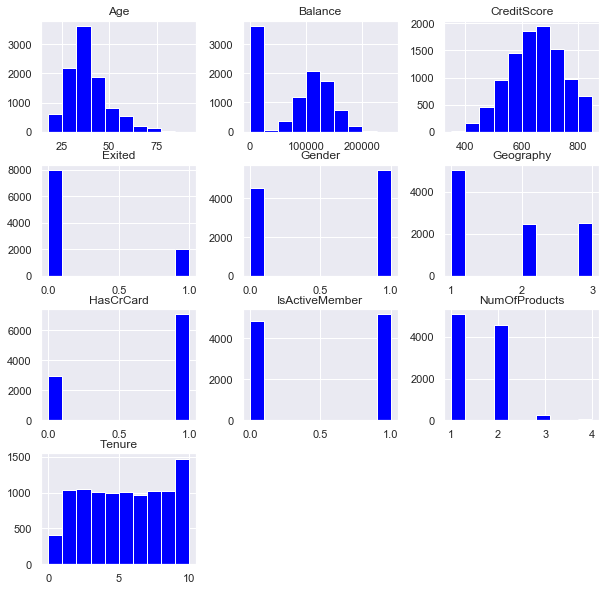

In [16]:
sns.set()
df_copy.hist(figsize=(10,10), color='blue')
plt.show()

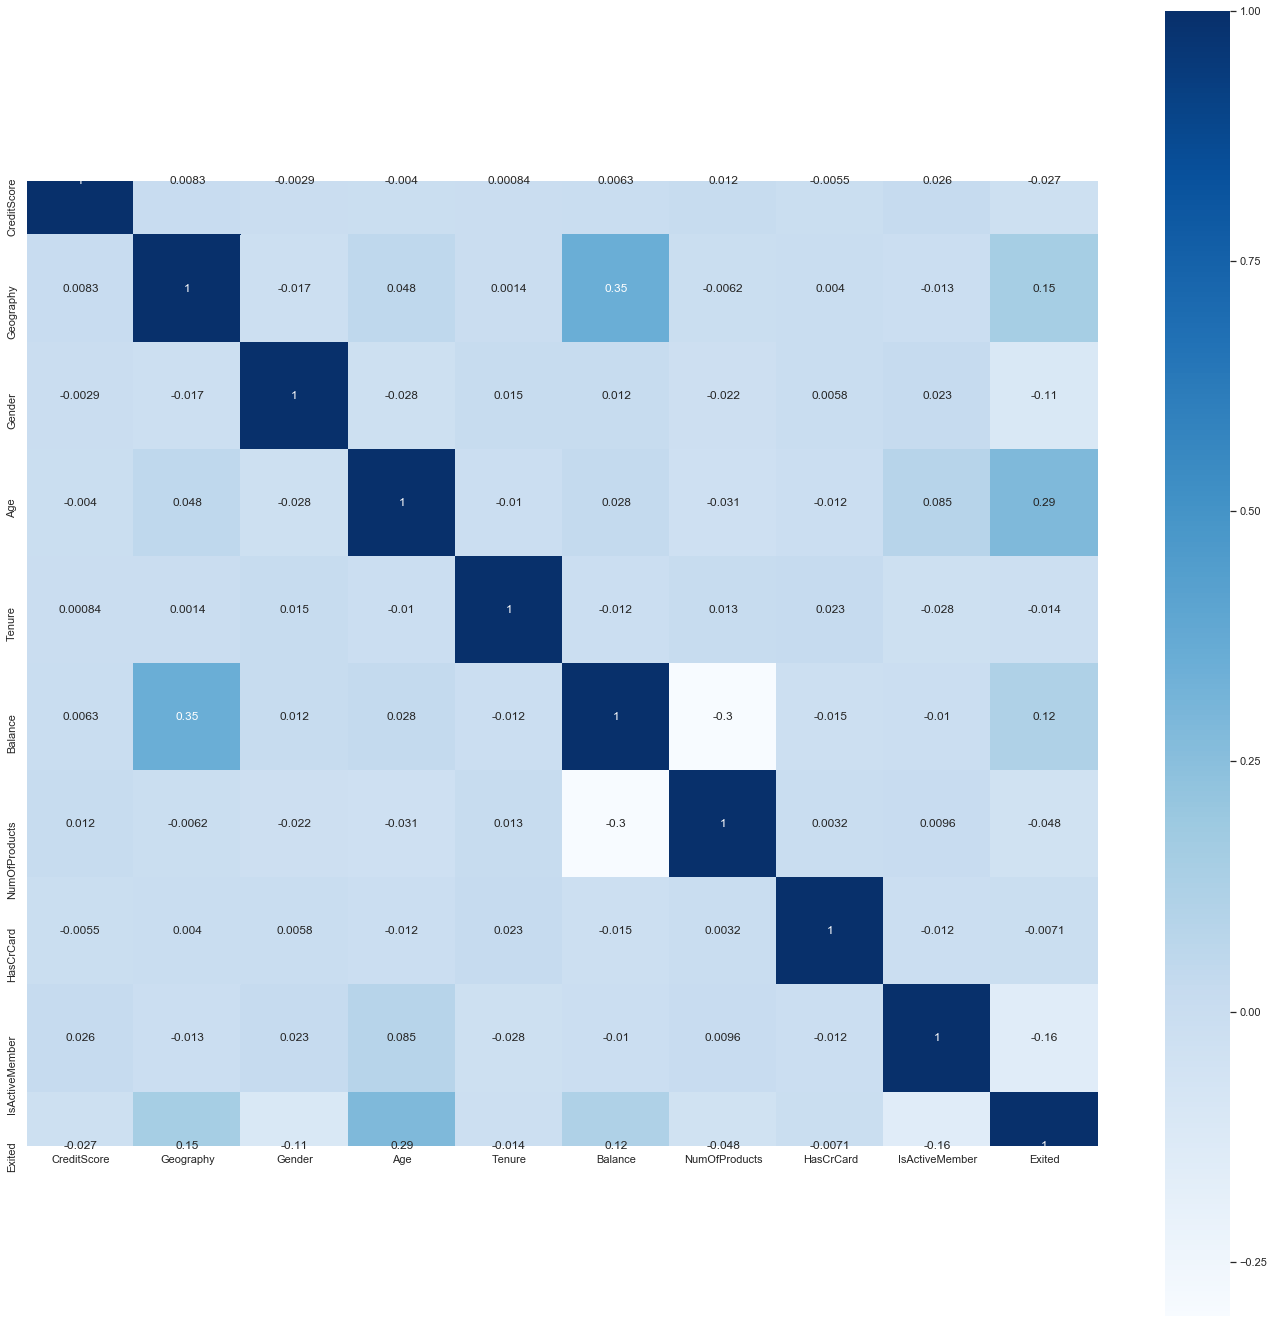

In [17]:
correlation = df_copy.corr()

import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(24,24))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

Cechy najsilniej skorelowane z 'exited' to:
    * Age (0.29)
    * IsActiveMember (-0.16)
    * Geography (0.15)
I ewentualnie:
    * Balance (0.12)
    * Gender (-0.11)
    
Czy wystepuja jakies korelacje miedzy nimi:
    * Balance & Geography (0.35) <- na to zwrocic uwage projektujac model

# Modele

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Regresja liniowa (RL)

In [19]:
from sklearn.linear_model import LinearRegression

### RL - Wszystkie zmienne

In [20]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [21]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [21]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
linreg_model.score(X_test, y_test)

0.1725842590009321

In [23]:
y_pred = linreg_model.predict(X_test)

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred)) - blad, podobno sa negatywne wartosci i MSLE nie dziala
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.28171813291439785
Root Mean Squared Error: 0.3663273250046828


### RL - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [25]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [26]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [28]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
linreg_model.score(X_test, y_test)

0.17385804860481446

In [30]:
y_pred = linreg_model.predict(X_test)

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred)) - blad, podobno sa negatywne wartosci i MSLE nie dziala
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.28155011052189766
Root Mean Squared Error: 0.36604523968593056


### RL - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [32]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [33]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [35]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
linreg_model.score(X_test, y_test)

0.16789744101091353

In [37]:
y_pred = linreg_model.predict(X_test)

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred)) - blad, podobno sa negatywne wartosci i MSLE nie dziala
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2823359986441192
Root Mean Squared Error: 0.36736337312176814


## Regresja logistyczna (RLog)

In [39]:
from sklearn.linear_model import LogisticRegression

### RLog - Wszystkie zmienne

In [40]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [41]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.29,random_state=42, stratify=y)

In [43]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train.ravel())

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
logreg_model.score(X_test, y_test)

0.7948275862068965

In [45]:
y_pred = logreg_model.predict(X_test)

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.20517241379310344
Mean Squared Logaritmic Error: 0.0985757045797689
Root Mean Squared Error: 0.4529596160731147


### RLog - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [47]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [48]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [50]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train.ravel())

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
logreg_model.score(X_test, y_test)

0.7965

In [52]:
y_pred = logreg_model.predict(X_test)

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2035
Mean Squared Logaritmic Error: 0.09777218833235397
Root Mean Squared Error: 0.4511097427455984


### RLog - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [54]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [55]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [57]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train.ravel())

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
logreg_model.score(X_test, y_test)

0.8166666666666667

In [59]:
y_pred = logreg_model.predict(X_test)

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.18333333333333332
Mean Squared Logaritmic Error: 0.08808305255167026
Root Mean Squared Error: 0.4281744192888376


## Drzewo decyzyjne (DT)

In [61]:
from sklearn.tree import DecisionTreeClassifier

### DT - wszystkie zmienne

In [62]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [63]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42, stratify=y)

In [65]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [66]:
dt_model.score(X_test, y_test)

0.7985714285714286

In [67]:
y_pred = dt_model.predict(X_test)

In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.20142857142857143
Mean Squared Logaritmic Error: 0.09677696423209484
Root Mean Squared Error: 0.4488079449258574


### DT - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [69]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [70]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.31,random_state=42, stratify=y)

In [72]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [73]:
dt_model.score(X_test, y_test)

0.7903225806451613

In [74]:
y_pred = dt_model.predict(X_test)

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.20967741935483872
Mean Squared Logaritmic Error: 0.10074014807962287
Root Mean Squared Error: 0.4579054698896255


### DT - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [76]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [77]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.29,random_state=42, stratify=y)

In [79]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [80]:
dt_model.score(X_test, y_test)

0.8293103448275863

In [81]:
y_pred = dt_model.predict(X_test)

In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1706896551724138
Mean Squared Logaritmic Error: 0.08200835927224472
Root Mean Squared Error: 0.41314604581481085


## Random Forest (RF)

In [83]:
from sklearn.ensemble import RandomForestClassifier

### RF - wszystkie zmienne

In [84]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [85]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [87]:
rf_model = RandomForestClassifier(n_estimators=27, random_state = 0)
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=27,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [88]:
rf_model.score(X_test, y_test)

0.863

In [89]:
y_pred = rf_model.predict(X_test)

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.137
Mean Squared Logaritmic Error: 0.06582206290679357
Root Mean Squared Error: 0.37013511046643494


### RF - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [91]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [92]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.31,random_state=42, stratify=y)

In [94]:
rf_model = RandomForestClassifier(n_estimators=10, random_state = 0)
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [95]:
rf_model.score(X_test, y_test)

0.8151612903225807

In [96]:
y_pred = rf_model.predict(X_test)

In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.18483870967741936
Mean Squared Logaritmic Error: 0.08880631515326755
Root Mean Squared Error: 0.4299287262761345


### RF - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [98]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [99]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.29,random_state=42, stratify=y)

In [101]:
rf_model = RandomForestClassifier(n_estimators=15, random_state = 0)
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [102]:
rf_model.score(X_test, y_test)

0.8320689655172414

In [103]:
y_pred = rf_model.predict(X_test)

In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16793103448275862
Mean Squared Logaritmic Error: 0.08068297164764278
Root Mean Squared Error: 0.40979389268601674


## Random Forest Regressor (RFR)

In [105]:
from sklearn.ensemble import RandomForestRegressor

### RFR - wszystkie zmienne

In [106]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [107]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [109]:
regressor_model = RandomForestRegressor(n_estimators=40, random_state=0)
regressor_model.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [110]:
regressor_model.score(X_test, y_test)

0.33366190341803326

In [111]:
y_pred = regressor_model.predict(X_test)

In [112]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.20699
Mean Squared Logaritmic Error: 0.05445615774262132
Root Mean Squared Error: 0.3287016124085795


### RF - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [113]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [114]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.28,random_state=42, stratify=y)

In [116]:
regressor_model = RandomForestRegressor(n_estimators=100, random_state=0)
regressor_model.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [117]:
regressor_model.score(X_test, y_test)

0.13806108283856122

In [118]:
y_pred = regressor_model.predict(X_test)

In [119]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.24456802880957468
Mean Squared Logaritmic Error: 0.07033466409457376
Root Mean Squared Error: 0.3740206854151222


### RFR - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [120]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [121]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.29,random_state=42, stratify=y)

In [123]:
regressor_model = RandomForestRegressor(n_estimators=15, random_state=0)
regressor_model.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [124]:
regressor_model.score(X_test, y_test)

0.19511819166000988

In [125]:
y_pred = regressor_model.predict(X_test)

In [126]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.24511527721951537
Mean Squared Logaritmic Error: 0.0649641892096178
Root Mean Squared Error: 0.3613880310238758


## KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier

### KNN - wszystkie zmienne

In [128]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [129]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [131]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train.ravel())
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [132]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [133]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.7 % and k = [23]


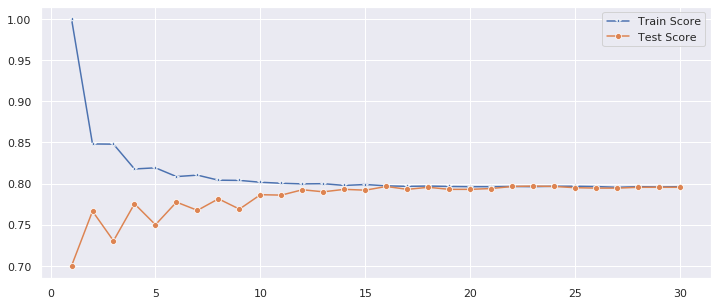

In [134]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [135]:
knn = KNeighborsClassifier(23)

knn.fit(X_train,y_train.ravel())
knn.score(X_test,y_test)

0.797

In [136]:
y_pred = knn.predict(X_test)

In [137]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.203
Mean Squared Error: 0.203
Root Mean Squared Error: 0.4505552130427524


### KNN - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [138]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [139]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [141]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train.ravel())
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [142]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 94.4875 % and k = [1]


In [143]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 80.45 % and k = [26]


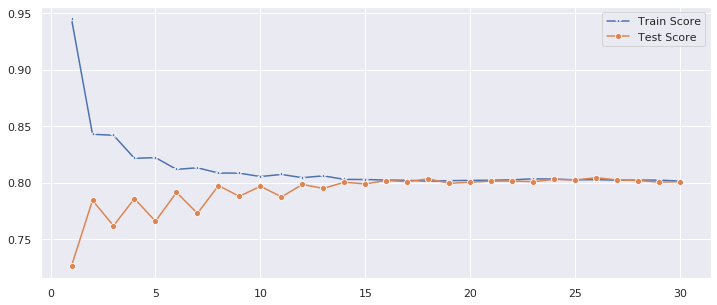

In [144]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [145]:
knn = KNeighborsClassifier(26)

knn.fit(X_train,y_train.ravel())
knn.score(X_test,y_test)

0.8045

In [146]:
y_pred = knn.predict(X_test)

In [147]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1955
Mean Squared Error: 0.1955
Root Mean Squared Error: 0.44215381938868287


### KNN - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [148]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [149]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [150]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [151]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train.ravel())
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [152]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 84.15 % and k = [15]


In [153]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 83.35000000000001 % and k = [22]


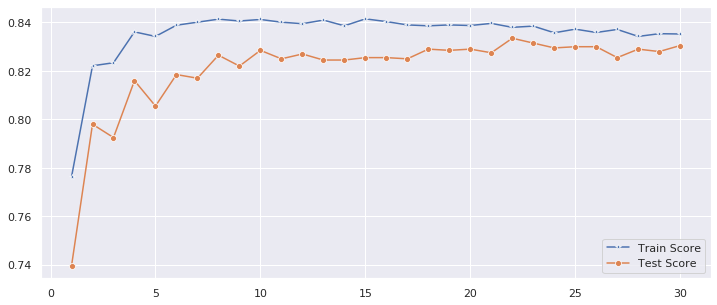

In [154]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [155]:
knn = KNeighborsClassifier(22)

knn.fit(X_train,y_train.ravel())
knn.score(X_test,y_test)

0.8335

In [156]:
y_pred = knn.predict(X_test)

In [157]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1665
Mean Squared Error: 0.1665
Root Mean Squared Error: 0.4080441152620633


## SVM

In [16]:
from sklearn import svm

### SVM - wszystkie zmienne

In [17]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [18]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

Kernel liniowy

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
linear_svm = svm.SVC(kernel='linear', random_state=0, C=5)
linear_svm.fit(X_train, y_train.ravel())

In [ ]:
linear_svm.score(X_train, y_train)

In [ ]:
y_pred = linear_svm.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Kernel RBF

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
rbf_svm = svm.SVC(kernel='rbf',random_state=0, C=150)
rbf_svm.fit(X_train, y_train.ravel())

In [ ]:
rbf_svm.score(X_train, y_train)

In [ ]:
y_pred = rbf_svm.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### SVM - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [ ]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [ ]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

Kernel liniowy

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
linear_svm = svm.SVC(kernel='linear', random_state=0, C=5)
linear_svm.fit(X_train, y_train.ravel())

In [ ]:
linear_svm.score(X_train, y_train)

In [ ]:
y_pred = linear_svm.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Kernel RBF

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
rbf_svm = svm.SVC(kernel='rbf',random_state=0, C=150)
rbf_svm.fit(X_train, y_train.ravel())

In [ ]:
rbf_svm.score(X_train, y_train)

In [ ]:
y_pred = rbf_svm.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### SVM - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [ ]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [ ]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

Kernel liniowy

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
linear_svm = svm.SVC(kernel='linear', random_state=0, C=5)
linear_svm.fit(X_train, y_train.ravel())

In [ ]:
linear_svm.score(X_train, y_train)

In [ ]:
y_pred = linear_svm.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Kernel RBF

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
rbf_svm = svm.SVC(kernel='rbf',random_state=0, C=150)
rbf_svm.fit(X_train, y_train.ravel())

In [ ]:
rbf_svm.score(X_train, y_train)

In [ ]:
y_pred = rbf_svm.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

### BAYES - wszystkie zmienne

In [ ]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [ ]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train.ravel())

In [ ]:
model.score(X_test, y_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### BAYES - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [ ]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [ ]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train.ravel())

In [ ]:
model.score(X_test, y_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### BAYES - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [ ]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [ ]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train.ravel())

In [ ]:
model.score(X_test, y_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))